In [3]:
import pandas as pd
import random ###  To install Random as I need make a smaller dataset 

### Make a smaller dataset 
I tried to run a model on over 300K dataset, it took so long to run, 
so i decide to make the dataset smaller.

In [4]:


filename = "data/train_data.csv" 
n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
s = n//60  # sample size of 10%
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
df = pd.read_csv(filename, skiprows=skip)

In [5]:
df.shape
# Now the dataset has only 37 432 rows , much smaller

(6238, 16)

In [6]:
#df = pd.read_csv('data/train_data.csv')

### Understand the dataset

In [7]:
#Quick look at the data
df.head()

,customerId,accountId,Lending,Loan Collateral,Deposits,AvgTradedValue3M,AvgTrades3M,Sex,Age Span,Months on Book,Customer Type,Office Nr,Country,Interest model Nr,Social Customer,Category
0,4211969,9677722,0.0,0.0,881347.92,4939038.2,47.43,M,56-65,290,Retail,5,SE,313,0.0,Premium
1,4212026,8803123,0.0,0.0,156152.50,0.0,0.00,M,56-65,290,Retail,5,SE,313,0.0,Premium
2,8407119,8923827,0.0,0.0,16709.72,0.0,0.00,F,46-55,288,Retail,5,SE,313,0.0,Standard
3,8408539,538309,0.0,0.0,958.53,0.0,0.00,M,66-76,286,Retail,5,SE,4,0.0,Standard
4,8411154,9337907,0.0,0.0,0.00,0.0,0.00,M,46-55,285,Active Trader,91,SE,50,1.0,Premium


In [8]:
# Category is the target and see how many possible values in this target
df.Category.unique()

array(['Premium', 'Standard'], dtype=object)

In [9]:
# Check data types of each column
df.dtypes

customerId             int64
accountId              int64
Lending              float64
Loan Collateral      float64
Deposits             float64
AvgTradedValue3M     float64
AvgTrades3M          float64
Sex                   object
Age Span              object
Months on Book         int64
Customer Type         object
Office Nr              int64
Country               object
Interest model Nr      int64
Social Customer      float64
Category              object
dtype: object

In [10]:
# Check the number of rows and columns 
df.shape

(6238, 16)

In [11]:
# Check the number of rows
df.shape[0]

6238

In [12]:
# check the number of columns
df.shape[1]

16

In [13]:
# Check the number of unique values in each column
df.nunique()

customerId           6154
accountId            6238
Lending               315
Loan Collateral       112
Deposits             3270
AvgTradedValue3M     1500
AvgTrades3M           110
Sex                     2
Age Span                5
Months on Book        289
Customer Type           5
Office Nr              80
Country                 4
Interest model Nr      52
Social Customer         2
Category                2
dtype: int64

### Handle Missing Values

In [14]:
df.Sex.unique()

array(['M', 'F'], dtype=object)

In [15]:
df['Age Span'].unique()

array(['56-65', '46-55', '66-76', '36-45', '26-35'], dtype=object)

In [16]:
df['Customer Type'].unique()

array(['Retail', 'Active Trader', 'Private Banking', 'Partner',
       'Pension only'], dtype=object)

In [17]:
df.Country.unique()

array(['SE', 'DK', 'NO', 'FI'], dtype=object)

In [18]:
df.Category.unique()

array(['Premium', 'Standard'], dtype=object)

In [19]:
# Check if this dataset has missing values
df.isnull().any()

customerId           False
accountId            False
Lending              False
Loan Collateral      False
Deposits             False
AvgTradedValue3M     False
AvgTrades3M          False
Sex                  False
Age Span             False
Months on Book       False
Customer Type        False
Office Nr            False
Country              False
Interest model Nr    False
Social Customer      False
Category             False
dtype: bool

Luckily, this dataset has no missing values.

### Transform dataset to be more machine-learning friendly

In [20]:
# sex is an object , it is better to convert it to integer
df.Sex.unique()

array(['M', 'F'], dtype=object)

In [21]:
sex_map = {'M': 1,'F': 2}
df.Sex = [sex_map[item] for item in df.Sex]

In [22]:
df.head()

,customerId,accountId,Lending,Loan Collateral,Deposits,AvgTradedValue3M,AvgTrades3M,Sex,Age Span,Months on Book,Customer Type,Office Nr,Country,Interest model Nr,Social Customer,Category
0,4211969,9677722,0.0,0.0,881347.92,4939038.2,47.43,1,56-65,290,Retail,5,SE,313,0.0,Premium
1,4212026,8803123,0.0,0.0,156152.50,0.0,0.00,1,56-65,290,Retail,5,SE,313,0.0,Premium
2,8407119,8923827,0.0,0.0,16709.72,0.0,0.00,2,46-55,288,Retail,5,SE,313,0.0,Standard
3,8408539,538309,0.0,0.0,958.53,0.0,0.00,1,66-76,286,Retail,5,SE,4,0.0,Standard
4,8411154,9337907,0.0,0.0,0.00,0.0,0.00,1,46-55,285,Active Trader,91,SE,50,1.0,Premium


In [23]:
# Age Span is an object , it is better to convert it to integer

In [24]:
df['Age Span'].unique()

array(['56-65', '46-55', '66-76', '36-45', '26-35'], dtype=object)

In [25]:
age_span_map = {'26-35': 1,'36-45': 2,'46-55': 3,'56-65':4,'66-76':5}
df['Age Span'] = [age_span_map[item] for item in df['Age Span']]

In [26]:
df.head(3)

,customerId,accountId,Lending,Loan Collateral,Deposits,AvgTradedValue3M,AvgTrades3M,Sex,Age Span,Months on Book,Customer Type,Office Nr,Country,Interest model Nr,Social Customer,Category
0,4211969,9677722,0.0,0.0,881347.92,4939038.2,47.43,1,4,290,Retail,5,SE,313,0.0,Premium
1,4212026,8803123,0.0,0.0,156152.50,0.0,0.00,1,4,290,Retail,5,SE,313,0.0,Premium
2,8407119,8923827,0.0,0.0,16709.72,0.0,0.00,2,3,288,Retail,5,SE,313,0.0,Standard


In [27]:
# Customer Type is an object , it is better to convert it to integer

In [28]:
df['Customer Type'].unique()

array(['Retail', 'Active Trader', 'Private Banking', 'Partner',
       'Pension only'], dtype=object)

In [29]:
customer_type_map = {'Retail':1,'Private Banking':2,'Active Trader':3,'Partner':4,'Pension only':5}
df['Customer Type']= [customer_type_map[item] for item in df['Customer Type']]

In [30]:
df.head(3)

,customerId,accountId,Lending,Loan Collateral,Deposits,AvgTradedValue3M,AvgTrades3M,Sex,Age Span,Months on Book,Customer Type,Office Nr,Country,Interest model Nr,Social Customer,Category
0,4211969,9677722,0.0,0.0,881347.92,4939038.2,47.43,1,4,290,1,5,SE,313,0.0,Premium
1,4212026,8803123,0.0,0.0,156152.50,0.0,0.00,1,4,290,1,5,SE,313,0.0,Premium
2,8407119,8923827,0.0,0.0,16709.72,0.0,0.00,2,3,288,1,5,SE,313,0.0,Standard


In [31]:
# Country is an object , it is better to convert it to integer

In [32]:
df.Country.unique()

array(['SE', 'DK', 'NO', 'FI'], dtype=object)

In [33]:
country_map = {'SE':1,'FI':2,'DK':3,'NO':4}
df.Country = [country_map[item] for item in df.Country]

In [34]:
df.head(3)

,customerId,accountId,Lending,Loan Collateral,Deposits,AvgTradedValue3M,AvgTrades3M,Sex,Age Span,Months on Book,Customer Type,Office Nr,Country,Interest model Nr,Social Customer,Category
0,4211969,9677722,0.0,0.0,881347.92,4939038.2,47.43,1,4,290,1,5,1,313,0.0,Premium
1,4212026,8803123,0.0,0.0,156152.50,0.0,0.00,1,4,290,1,5,1,313,0.0,Premium
2,8407119,8923827,0.0,0.0,16709.72,0.0,0.00,2,3,288,1,5,1,313,0.0,Standard


In [35]:
# Category is an object , it is better to convert it to integer

In [36]:
df.Category.unique()

array(['Premium', 'Standard'], dtype=object)

In [37]:
category_map = {'Standard':0,'Premium':1}
df.Category = [category_map[item] for item in df.Category]

In [38]:
df.head(3)

,customerId,accountId,Lending,Loan Collateral,Deposits,AvgTradedValue3M,AvgTrades3M,Sex,Age Span,Months on Book,Customer Type,Office Nr,Country,Interest model Nr,Social Customer,Category
0,4211969,9677722,0.0,0.0,881347.92,4939038.2,47.43,1,4,290,1,5,1,313,0.0,1
1,4212026,8803123,0.0,0.0,156152.50,0.0,0.00,1,4,290,1,5,1,313,0.0,1
2,8407119,8923827,0.0,0.0,16709.72,0.0,0.00,2,3,288,1,5,1,313,0.0,0


In [39]:
df.dtypes

customerId             int64
accountId              int64
Lending              float64
Loan Collateral      float64
Deposits             float64
AvgTradedValue3M     float64
AvgTrades3M          float64
Sex                    int64
Age Span               int64
Months on Book         int64
Customer Type          int64
Office Nr              int64
Country                int64
Interest model Nr      int64
Social Customer      float64
Category               int64
dtype: object

In [40]:
# now dataset has only integer or float

<AxesSubplot: >

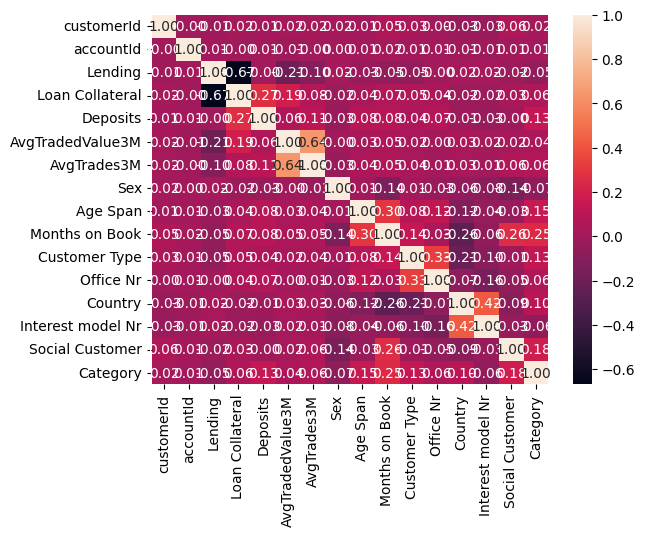

In [41]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True, fmt='.2f')

In [42]:
df = df.drop(['customerId','accountId','AvgTradedValue3M','AvgTrades3M','Sex','Age Span','Office Nr','Country','Interest model Nr'], axis=1)

In [43]:
df.head()

,Lending,Loan Collateral,Deposits,Months on Book,Customer Type,Social Customer,Category
0,0.0,0.0,881347.92,290,1,0.0,1
1,0.0,0.0,156152.50,290,1,0.0,1
2,0.0,0.0,16709.72,288,1,0.0,0
3,0.0,0.0,958.53,286,1,0.0,0
4,0.0,0.0,0.00,285,3,1.0,1


### Create a dependant and independant datasets

In [44]:
# Create independent dataset
x = df.drop('Category', axis = 1).copy()
x.head()

,Lending,Loan Collateral,Deposits,Months on Book,Customer Type,Social Customer
0,0.0,0.0,881347.92,290,1,0.0
1,0.0,0.0,156152.50,290,1,0.0
2,0.0,0.0,16709.72,288,1,0.0
3,0.0,0.0,958.53,286,1,0.0
4,0.0,0.0,0.00,285,3,1.0


In [45]:
# Create dependent dataset
y = df.Category.copy()
y.head()

0    1
1    1
2    0
3    0
4    1
Name: Category, dtype: int64

### Handle Categorical Values by One-Hot Coding

In [46]:
# Handle categorical variables by using one-hot encoding

In [47]:
x.dtypes

Lending            float64
Loan Collateral    float64
Deposits           float64
Months on Book       int64
Customer Type        int64
Social Customer    float64
dtype: object

x.Sex.unique()   #Remove after seaborn

x['Age Span'].unique()

In [48]:
x['Customer Type'].unique()

array([1, 3, 2, 4, 5])

x.Country.unique()

In [49]:
x['Social Customer'].unique()

array([0., 1.])

In [50]:
# One-hot coding 
encoded_columns = ['Customer Type','Social Customer']
x_encoded = pd.get_dummies(x, columns=encoded_columns)

In [51]:
x_encoded.head()

,Lending,Loan Collateral,Deposits,Months on Book,Customer Type_1,Customer Type_2,Customer Type_3,Customer Type_4,Customer Type_5,Social Customer_0.0,Social Customer_1.0
0,0.0,0.0,881347.92,290,1,0,0,0,0,1,0
1,0.0,0.0,156152.50,290,1,0,0,0,0,1,0
2,0.0,0.0,16709.72,288,1,0,0,0,0,1,0
3,0.0,0.0,958.53,286,1,0,0,0,0,1,0
4,0.0,0.0,0.00,285,0,0,1,0,0,0,1


In [52]:
x_encoded.columns

Index(['Lending', 'Loan Collateral', 'Deposits', 'Months on Book',
       'Customer Type_1', 'Customer Type_2', 'Customer Type_3',
       'Customer Type_4', 'Customer Type_5', 'Social Customer_0.0',
       'Social Customer_1.0'],
      dtype='object')

In [53]:
x_encoded.dtypes

Lending                float64
Loan Collateral        float64
Deposits               float64
Months on Book           int64
Customer Type_1          uint8
Customer Type_2          uint8
Customer Type_3          uint8
Customer Type_4          uint8
Customer Type_5          uint8
Social Customer_0.0      uint8
Social Customer_1.0      uint8
dtype: object

In [54]:
y.unique()

array([1, 0])

In [55]:
x_encoded.shape

(6238, 11)

In [56]:
y.shape

(6238,)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [58]:
# Split the dataset into Training and Testing
x_train , x_test,  y_train , y_test = train_test_split(x_encoded, y, random_state=42)


In [59]:
# Apply the classifier to the Training Dataset
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(x_train,y_train) #training model

[Text(0.6167703407635574, 0.9864864864864865, 'Deposits <= 4449.54\ngini = 0.491\nsamples = 4678\nvalue = [2647, 2031]\nclass = Standard'),
 Text(0.3261523221716574, 0.9594594594594594, 'Months on Book <= 51.5\ngini = 0.45\nsamples = 3640\nvalue = [2397, 1243]\nclass = Standard'),
 Text(0.17605423639049864, 0.9324324324324325, 'Deposits <= 40.015\ngini = 0.36\nsamples = 2120\nvalue = [1621, 499]\nclass = Standard'),
 Text(0.054378726131910284, 0.9054054054054054, 'Lending <= -819.75\ngini = 0.287\nsamples = 1476\nvalue = [1220, 256]\nclass = Standard'),
 Text(0.007337613607937964, 0.8783783783783784, 'Lending <= -2239.52\ngini = 0.124\nsamples = 15\nvalue = [1, 14]\nclass = Premium'),
 Text(0.006003502042858334, 0.8513513513513513, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = Premium'),
 Text(0.008671725173017593, 0.8513513513513513, 'Lending <= -1675.13\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Premium'),
 Text(0.007337613607937964, 0.8243243243243243, 'gini = 0.0\nsa

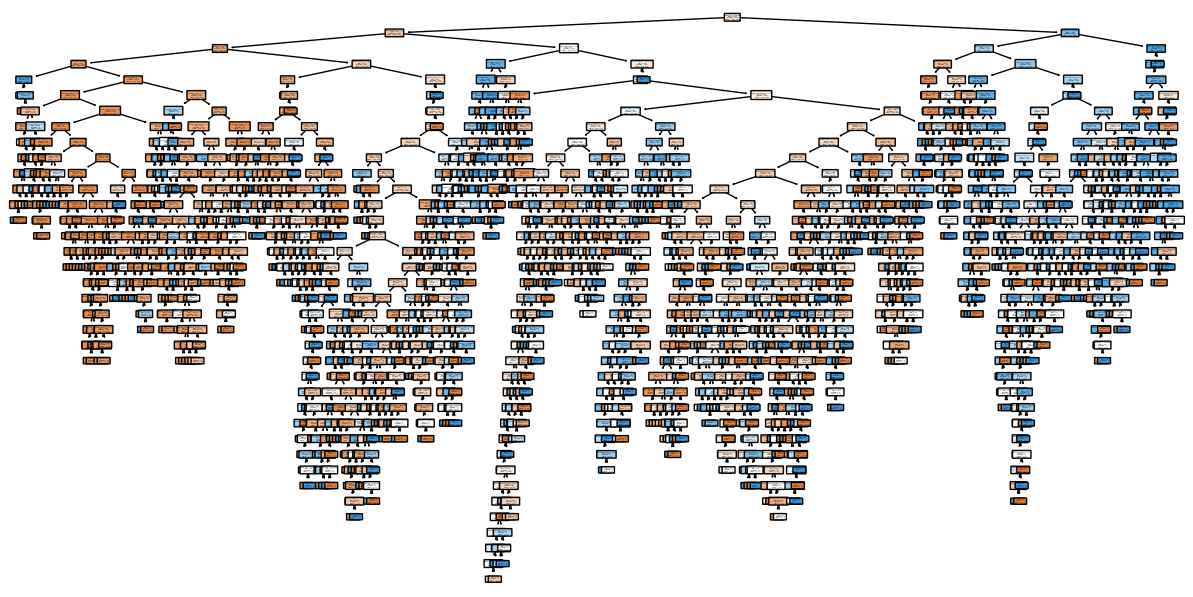

In [60]:
#Create a graph of decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7.5))

plot_tree(
    clf_dt,
    filled = True,
    rounded = True,
    class_names=['Standard','Premium'],
    feature_names=x_encoded.columns
)

/Users/Kristen/Learn_Python/itHogskolan-python/pythonAssignment2/.env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


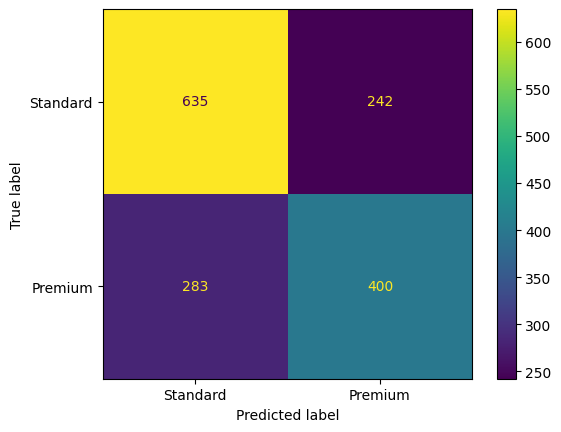

In [61]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_dt, x_test, y_test, display_labels= ['Standard','Premium'])


In [62]:
print(f'{(637/(637+246))*100: .2f} % predicted of Standard')
print(f'{(382/(295+382))*100: .2f} % predicted of Premium')

 72.14 % predicted of Standard
 56.43 % predicted of Premium


### Tree Pruning
#### Remove unncessary branches

In [63]:
path = clf_dt.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
ccp_alphas

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.98538652e-07, 2.54484008e-07, 8.22179103e-07, 1.37029851e-06,
       1.47343925e-06, 1.72392393e-06, 1.83885219e-06, 2.41797122e-06,
       3.28871641e-06, 3.39312011e-06, 3.50063976e-06, 3.75853304e-06,
       4.07174413e-06, 4.34779458e-06, 4.50034878e-06, 5.08968016e-06,
       5.66447534e-06, 6.10761620e-06, 6.70640210e-06, 7.12555223e-06,
       8.22179103e-06, 8.63703301e-06, 9.04654750e-06, 9.50073631e-06,
       1.05512174e-05, 1.26676484e-05, 1.42511045e-05, 1.42511045e-05,
       1.48063423e-05, 1.68763079e-05, 1.78138806e-05, 1.78138806e-05,
       1.83024218e-05, 1.84629693e-05, 2.13766567e-05, 2.13766567e-05,
       2.13766567e-05, 2.15761402e-05, 2.35143224e-05, 2.37518408e-05,
       2.46653731e-05, 2.74842729e-05, 2.85022089e-05, 2.90111769e-05,
       2.91499864e-05, 2.97414354e-05, 3.00335776e-05, 3.05380810e-05,
      

In [64]:
clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    clf_dt.fit(x_train,y_train)
    clf_dts.append(clf_dt)


In [65]:
train_scores = [clf_dt.score(x_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(x_test, y_test) for clf_dt in clf_dts]

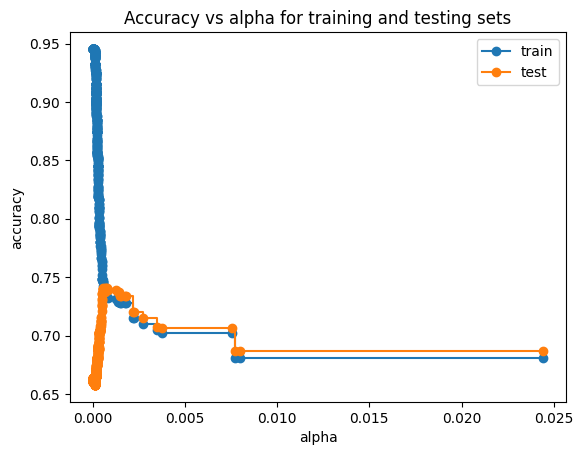

In [66]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle = 'steps-post')
ax.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle = 'steps-post')
ax.legend()
plt.show()

Cross Validation Score

<AxesSubplot: xlabel='tree'>

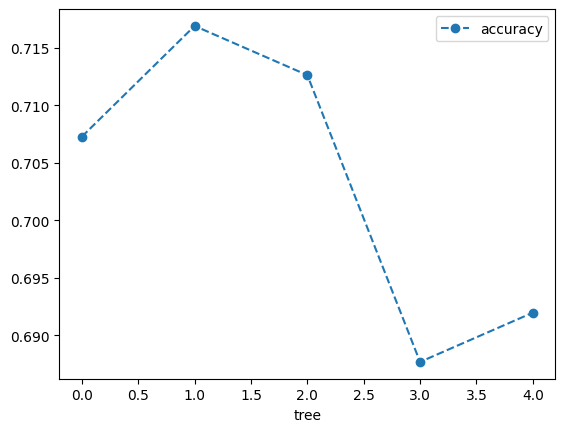

In [76]:
from sklearn.model_selection import cross_val_score
clf_dt = DecisionTreeClassifier(random_state=43, ccp_alpha=0.003)
scores = cross_val_score(clf_dt, x_train,y_train,cv=5)

df= pd.DataFrame(data= {'tree':range(5),'accuracy':scores})
df.plot(x='tree',y='accuracy',marker = 'o', linestyle ='--')

In [77]:
import numpy as np

alpha_loop_scores = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt,x_train,y_train,cv=5)
    alpha_loop_scores.append([ccp_alpha,np.mean(scores),np.std(scores)])

<AxesSubplot: xlabel='alpha'>

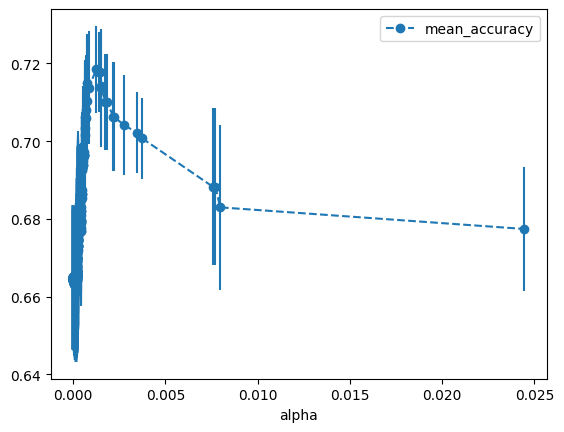

In [78]:
alpha_results = pd.DataFrame(alpha_loop_scores,columns =['alpha','mean_accuracy','std'])
alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std', marker = 'o',linestyle='--')

In [79]:
alpha_results[(alpha_results['alpha']>0.001)&(alpha_results['alpha']<0.003)]

,alpha,mean_accuracy,std
478,0.001248,0.718464,0.011175
479,0.001376,0.717823,0.010348
480,0.001431,0.717823,0.010348
481,0.001488,0.714187,0.014671
482,0.001529,0.713545,0.014974
483,0.001742,0.710126,0.012378
484,0.001831,0.710126,0.012378
485,0.002181,0.706278,0.014043
486,0.002228,0.706278,0.014043
487,0.002741,0.704141,0.012939


In [84]:
optimal_alpha = alpha_results[(alpha_results['alpha']>0.001)&(alpha_results['alpha']<0.003)]['alpha']

In [87]:
from statistics import mean 
avg_optimal_alpha = mean(optimal_alpha) 
avg_optimal_alpha


0.0017794309297921767

In [88]:
final_alpha = float(avg_optimal_alpha)
final_alpha

0.0017794309297921767

Final Tree

In [89]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42,ccp_alpha=final_alpha,criterion = 'gini')
clf_dt_pruned.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0017794309297921767, random_state=42)

/Users/Kristen/Learn_Python/itHogskolan-python/pythonAssignment2/.env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


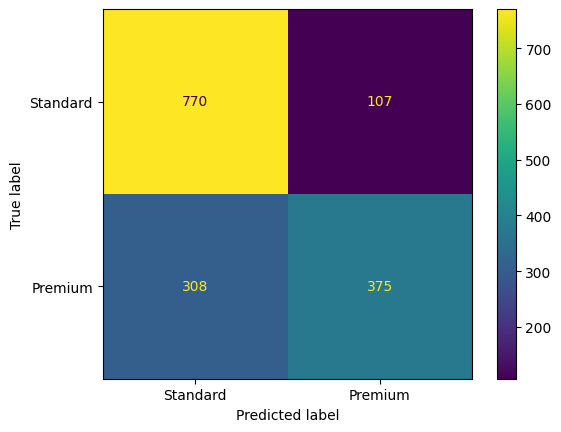

In [90]:
plot_confusion_matrix(clf_dt_pruned, x_test, y_test, display_labels= ['Standard','Premium'])

In [91]:
print(f'{(770/(770+107))*100: .2f} % predicted of Standard')
print(f'{(375/(308+375))*100: .2f} % predicted of Premium')

 87.80 % predicted of Standard
 54.90 % predicted of Premium


[Text(0.6071428571428571, 0.9375, 'Deposits <= 4449.54\ngini = 0.491\nsamples = 4678\nvalue = [2647, 2031]\nclass = Standard'),
 Text(0.35714285714285715, 0.8125, 'Months on Book <= 51.5\ngini = 0.45\nsamples = 3640\nvalue = [2397, 1243]\nclass = Standard'),
 Text(0.21428571428571427, 0.6875, 'Deposits <= 40.015\ngini = 0.36\nsamples = 2120\nvalue = [1621, 499]\nclass = Standard'),
 Text(0.14285714285714285, 0.5625, 'Lending <= -819.75\ngini = 0.287\nsamples = 1476\nvalue = [1220, 256]\nclass = Standard'),
 Text(0.07142857142857142, 0.4375, 'gini = 0.124\nsamples = 15\nvalue = [1, 14]\nclass = Premium'),
 Text(0.21428571428571427, 0.4375, 'Months on Book <= 26.5\ngini = 0.276\nsamples = 1461\nvalue = [1219, 242]\nclass = Standard'),
 Text(0.14285714285714285, 0.3125, 'gini = 0.22\nsamples = 952\nvalue = [832, 120]\nclass = Standard'),
 Text(0.2857142857142857, 0.3125, 'gini = 0.364\nsamples = 509\nvalue = [387, 122]\nclass = Standard'),
 Text(0.2857142857142857, 0.5625, 'gini = 0.47\ns

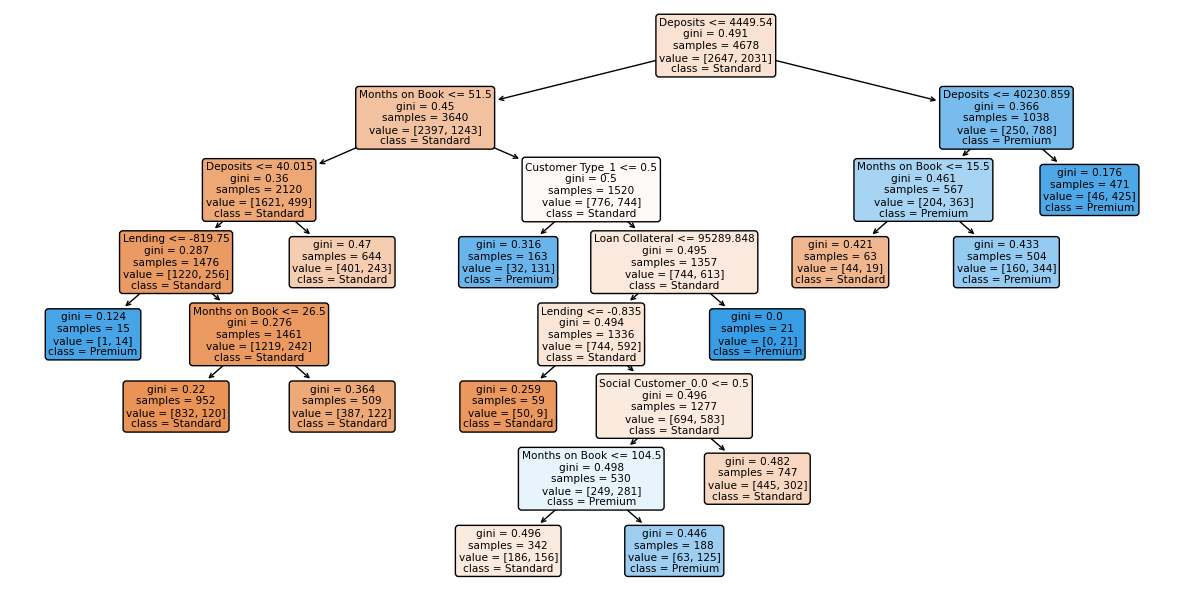

In [93]:
plt.figure(figsize=(15, 7.5))

plot_tree(
    clf_dt_pruned,
    filled = True,
    rounded = True,
    class_names=['Standard','Premium'],
    feature_names=x_encoded.columns
)

To conclude :
The accuracy rate of predicting standard customer is quite high which is 87%.
But the accuracy rate of predicting premium customer is not quite high which is 55%.
Deposits is one of key predicators to predict if the custome is premium which makes senses because the basic
criteria of qualifying a premium customer is based on the amount of deposits in the bank. 
I would try using regression model to predict premium customers and see if the accuracy rate will be improved.

I wanna say big thank you , Joakim. I have a lot in this class and I will revisit some of courses for sure. Tusen tack.
